In [1]:
%matplotlib inline
import os

from typing import List

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

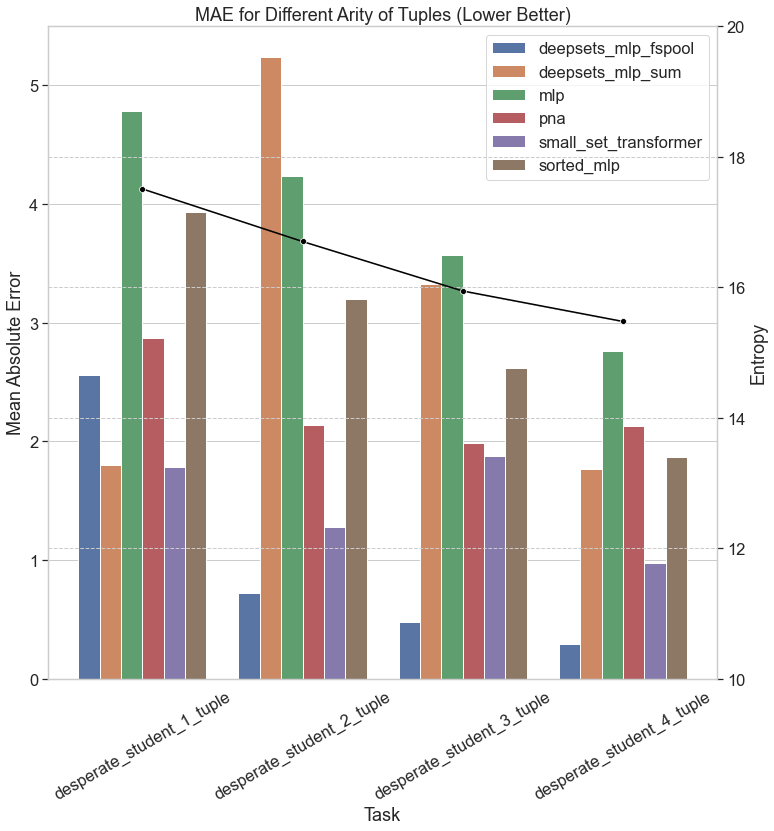

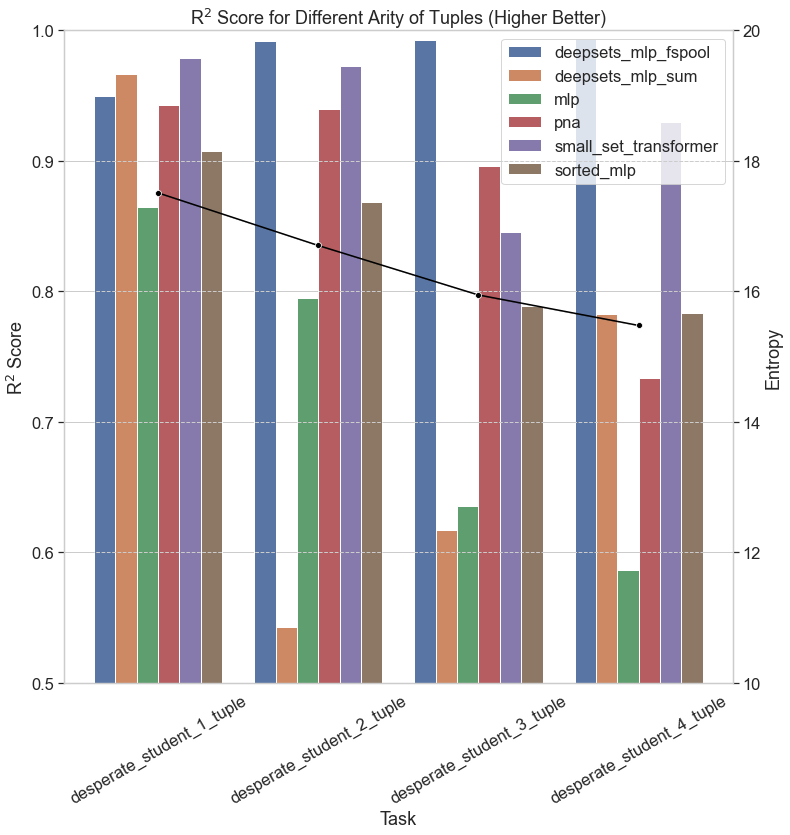

In [41]:
def plot_results(raw_results: pd.DataFrame, tasks: List[str], models: List[str]) -> None:
    ### Filtering ###
    results = raw_results.copy()
    results = results[results["type"].isin(models)]
    results = results[results["label"].isin(tasks)]

    results = results[["type", "label", "test_label_entropy", "test_mae", "test_r2", "random_seed"]]

    results = results.rename(
        columns={
            "type": "model",
            "label": "task",
            "test_label_entropy": "entropy",
            "test_mae": "mae",
            "test_r2": "r2",
            "random_seed": "seed",
        }
    )

    ### Accumulation ###

    mean_results = results.groupby(["model", "task"], as_index=False).mean()
    mean_results.drop("seed", axis="columns", inplace=True)

    ### Display MAE ###

    _, ax_1 = plt.subplots(figsize=(12,12))

    sns.barplot(
        x=mean_results["task"],
        y=mean_results["mae"],
        hue=mean_results["model"],
        ax=ax_1
    )
    ax_1.set_title("MAE for Different Arity of Tuples (Lower Better)")
    ax_1.set_xlabel("Task")
    ax_1.set_ylabel("Mean Absolute Error")
    ax_1.tick_params(axis='x', labelrotation=30)
    ax_1.get_legend().set_title("")

    ax_2 = ax_1.twinx()

    sns.lineplot(
        x=results["task"],
        y=results["entropy"],
        marker="o",
        color="black",
        ax=ax_2
    )
    ax_2.set_ylabel("Entropy")
    ax_2.set_ylim([10.0, 20.0])
    ax_2.get_yaxis().grid(linestyle="dashed")

    _, ax_1 = plt.subplots(figsize=(12, 12))

    sns.barplot(
        x=mean_results["task"],
        y=mean_results["r2"],
        hue=mean_results["model"],
        ax=ax_1
    )
    ax_1.set_title("R$^2$ Score for Different Arity of Tuples (Higher Better)")
    ax_1.set_ylim([0.5, 1.0])
    ax_1.set_xlabel("Task")
    ax_1.set_ylabel("R$^2$ Score")
    ax_1.set_ylim([0.5, 1.0])
    ax_1.tick_params(axis='x', labelrotation=30)
    ax_1.get_legend().set_title("")

    ax_2 = ax_1.twinx()

    sns.lineplot(
        x=results["task"],
        y=results["entropy"],
        marker="o",
        color="black",
        ax=ax_2
    )
    ax_2.set_ylabel("Entropy")
    ax_2.set_ylim([10.0, 20.0])
    ax_2.get_yaxis().grid(linestyle="dashed")

plot_results(
    pd.read_csv("desperate-student-m-tuple-results.csv"),
    tasks=[f"desperate_student_{m}_tuple" for m in [1, 2, 3, 4]],
    models=[
        "deepsets_mlp_sum",
        "deepsets_mlp_fspool",
        "sorted_mlp",
        "mlp",
        "pna",
        "small_set_transformer"
    ]
)